<a href="https://colab.research.google.com/github/wiktoriaszmidt/lecture1/blob/main/klasyfikacja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_breast_cancer, load_iris
data = load_breast_cancer()

print(data.feature_names)
print(data.target_names)

y = data.target #list(data.target_names)
X = data.data #data.feature_names

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


1. Sprawdź liczbę wszystkich przypadków

2. Sprawdź liczbę przypadków raka złośliwego

3. Narysuj histogram średniego obszary (mean area)

4. Narysuj wykres rozrzutu (scatterplot) średniego obszaru od klasyfikacji (użyj
sns.regplot)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print(f"Liczba wszystkich przypadków: {len(y)}")


Liczba wszystkich przypadków: 569


In [ ]:
malignant_cases = sum(1 for case in y if case == 0)
print(f"Liczba przypadków raka złośliwego: {malignant_cases}")


Liczba przypadków raka złośliwego: 212


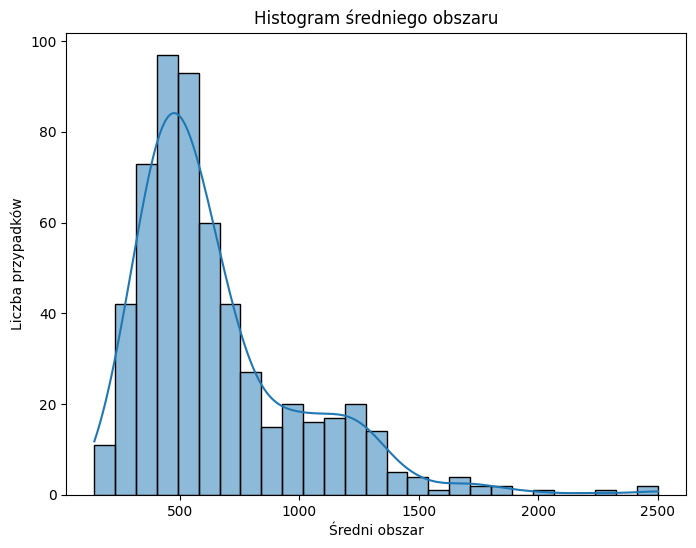

In [ ]:
mean_area = X[:, 3]


plt.figure(figsize=(8, 6))
sns.histplot(mean_area, kde=True)  # Added kde for density curve
plt.title('Histogram średniego obszaru')
plt.xlabel('Średni obszar')
plt.ylabel('Liczba przypadków')
plt.show()


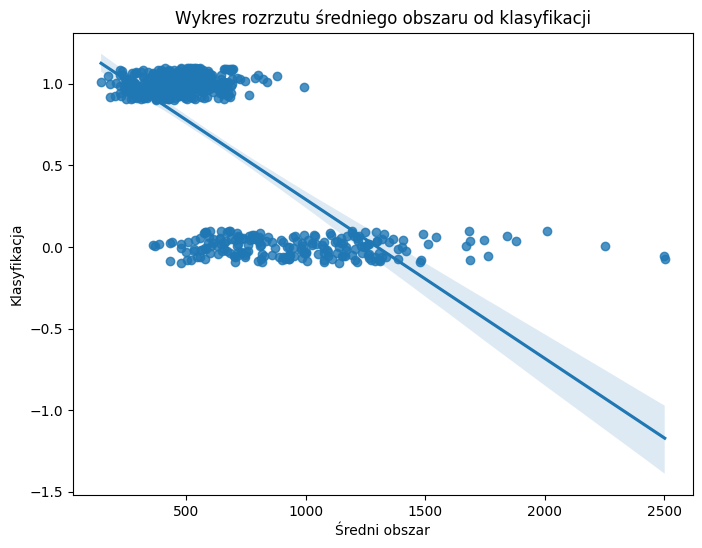

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.regplot(x=mean_area, y=y, y_jitter=0.1)
plt.title('Wykres rozrzutu średniego obszaru od klasyfikacji')
plt.xlabel('Średni obszar')
plt.ylabel('Klasyfikacja')
plt.show()


Zbuduj model regresji logistycznej

1. Sprawdź, jeśli dane nie są ustandaryzowane zrób to

2. Podziel zbiór danych na testowy (30%) i uczący (70%)

3. Zwizualizuj wyniki używając:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_curve

In [ ]:
from sklearn.linear_model import LogisticRegression

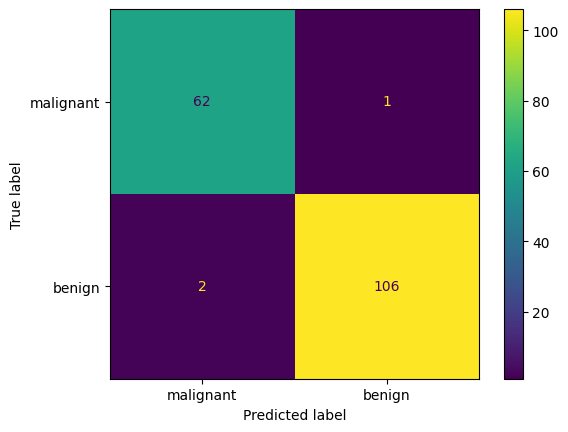

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


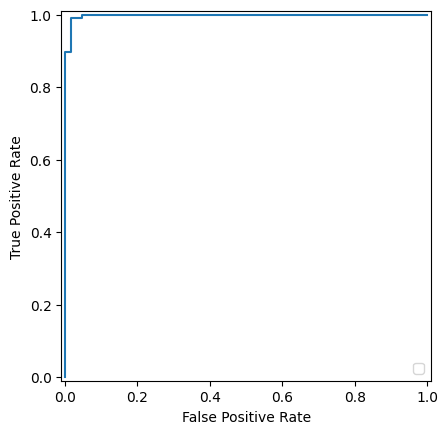

In [ ]:

# 1. Standaryzacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Podział danych na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 3. Trenowanie modelu regresji logistycznej
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Predykcja na zbiorze testowym
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] # Probabilities for the positive class


# Wizualizacja macierzy pomyłek
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot()
plt.show()

# Wizualizacja krzywej ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()
plt.show()
